# Sistem Rekomendasi Anime

## Project Overview

<img src="https://image.myanimelist.net/ui/5LYzTBVoS196gvYvw3zjwLgAvBFCaQ-G87EPlpMcd2s" width=400/>

Dewasa ini industri hiburan semakin berkembang, salah satunya ialah Anime. Anime diambil dari kata "animation" dalam bahasa Inggris merupakan animasi yang diproduksi di Jepang menggunakan teknologi komputer maupun manual dengan tangan. Anime mulai populer di kalangan masyarakat semenjak kehadiran Astro Boy karya Ozamu Tezuka pada tahun 1963. Hingga saat ini, anime sudah sangat berkembang dari segi grafis, musik maupun alur cerita yang lebih menarik. Sebuah data dari situs epicdope.com menampilkan 10 negara dengan jumlah peminat anime di tahun 2022. Negara di luar Jepang, yakni Amerika menempati posisi ke 2 dimana sebanyak 71.86% dari total penduduk telah menonton anime. 

<img src="https://user-images.githubusercontent.com/61647791/164499658-3477255a-911e-4714-9253-4403113714a1.png" width=600 />

Anime memiliki karakteristik yang umumnya bisa dilihat dari segi genre. Terdapat berbagai genre anime seperti horror, thriller, comedy, adventure dan sebagainya. Sebuah masalah muncul ketika pengguna ingin melihat anime dengan karakteristik sesuai dengan yang diinginkan, misalnya dari segi genre, rating, maupun tipe anime (movie, TV, OVA).  Oleh karena itu, muncul suatu ide untuk menerapkan sistem rekomendasi untuk memilih anime yang tepat sesuai keinginan pengguna. Terdapat beberapa manfaat apabila perusahaan streaming anime seperti <a href="https://www.crunchyroll.com/">Crunchyroll</a> menerapkan sistem rekomendasi, misalnya dapat meningkatkan jumlah anime yang ditonton, menyediakan anime yang beragam, meningkatkan kepuasan pengguna, serta bisa memahami preferensi pengguna terkait anime yang diinginkan.

## Business Understanding
Berdasarkan pemaparan di atas, berikut merupakan permasalahan beserta tujuan dibuatnya sistem rekomendasi anime:

### 1. Problem Statement
- Bagaimana cara membuat sistem rekomendasi anime yang merekomendasikan pengguna berdasarkan genre anime?
- Dengan menggunakan data rating yang dimiliki pengguna, bagaimana perusahaan jasa streaming dapat merekomendasikan anime yang belum pernah ditonton pengguna?

### 2. Goals
Untuk menjawab permasalahan tersebut dibuatlah sistem rekomendasi dengan tujuan sebagai berikut:
- Menghasilkan rekomendasi anime sebanyak N buah kepada pengguna berdasarkan genre.
- Menghasilkan beberapa rekomendasi anime yang sesuai dengan preferensi pengguna dan belum pernah ditonton.

### 3. Solutions
Untuk merealisasikan tujuan di atas dibuatlah dua jenis sistem sistem rekomendasi, yakni content based filtering dan collaborative filtering. Content based merupakan sistem akan merekomendasikan anime kepada pengguna berdasarkan karakteristik yang dimiliki anime, misalnya dari genre, penulis, maupun tipe anime (movie, TV, OVA). Di sisi lain, collaborative filtering merupakan sistem yang merekomendasikan anime yang belum pernah ditonton menggunakan data historis anime yang pernah ditonton sebelumnya. Dengan menggunakan kedua metode ini diharapkan dapat menghasilkan rekomendasi yang akurat sesuai dengan yang diinginkan pengguna. 

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rianromadhon","key":"12c2f5646f5199c415e6e4b2de4d6998"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#akses data dari kaggle
!kaggle datasets download -d CooperUnion/anime-recommendations-database

 20% 5.00M/25.0M [00:00<00:00, 36.5MB/s]
100% 25.0M/25.0M [00:00<00:00, 124MB/s] 


In [ ]:
#mengimpor library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile, os
import collections
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
import keras
from keras import layers
tf.config.run_functions_eagerly(True)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#ekstrak file
path = '/content/anime-recommendations-database.zip'
zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall()
zip_ref.close()

## Data Understanding

Dataset yang digunakan diambil dari API <a href="https://myanimelist.net/">myanimelist</a> dan terdiri dari 73,516 pengguna dan 12,294 anime. Dataset dapat diunduh melalui <a href="https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database">situs kaggle ini</a>. Terdapat dua buah file data berformat csv, yakni anime.csv dan rating. Keduanya akan dibahas terpisah beserta eksplorasi data untuk masing-masing file.
   

### 1. Anime
Dataset ini berisi beragam anime yang tersedia di situs myanimelist yang terdiri dari beberapa variabel, di antaranya:
- anime_id = ID unik dari myanimelist.net untuk mengidentifikasi anime.
- name = nama anime.
- genre  = list genre dari anime.
- type = jenis anime, apakah berupa movie, TV, OVA, dan sebagainya.
- episodes = jumlah episode yang dimiliki, apabila bertipe movie maka hanya memiliki 1 episode.
- rating = rata-rata rating anime dengan skala 1-10.
- members  = jumlah member komunitas anime tersebut. 

#### Menamplikan 5 Data Teratas


In [ ]:
#menampilkan 5 data teratas
anime = pd.read_csv("anime.csv")
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Seketika saya melihat ada nama anime yang mirip seperti Gintama* dan Gintama&#039. Keduanya sama-sama memiliki 51 episode dengan rating dan member yang berbeda. Saya tidak akan melakukan penggabungan data karena anime_id nya berbeda sehingga diasumsikan keduanya merupakan anime yang berbeda seri. Selanjutnya kita akan melihat informasi tipe data masing-masing atribut dan mengecek apakah terdapat missing value pada file anime.csv.

#### Mengecek Tipe Data dan Missing Value 

In [ ]:
#cek tipe data masing-masing atribut
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
#cek missing value
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Atribut anime_id seharusnya merupakan data nominal yang bersifat kategorikal, bukan data numerikal (int64). Untuk mencegah terjadinya operasi perhitungan pada atribut anime_id, maka pada tahap data preparation akan diubah tipe datanya menjadi object. Selain itu terdapat nilai null pada atribut genre, type dan rating. Dikarenakan kita akan membuat sistem rekomendasi berdasarkan genre, maka nilai yang kosong pada atribut genre akan kita hapus. Kita tidak akan menghapus nilai kosong pada atribut rating maupun type karena keduanya tidak diperlukan untuk membuat sistem rekomendasi berdasarkan genre. Untuk membuat sistem rekomendasi tersebut, kita hanya memerlukan atribut anime_id, name dan genre.

Selanjutnya kita akan melihat statistika deskriptif untuk kolom **rating** dan **members**. Kita akan melihat berapakah rata-rata member di seluruh anime tersebut, maupun rata-rata rating terendah dan tertinggi. Selain itu, kita juga akan melihat distribusi genre anime untuk melihat kira-kira genre apa yang paling mendominasi.

#### Statistika Deskriptif dan Distribusi Genre

In [ ]:
#statistika deskriptif
anime[["rating","members"]].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


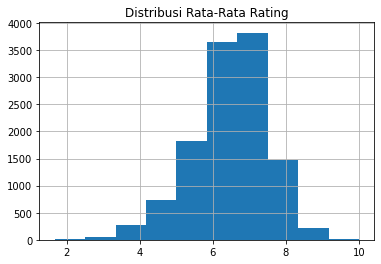

In [ ]:
#histogram rating
anime.rating.hist()
plt.title("Distribusi Rata-Rata Rating")
plt.show()

In [ ]:
#data jumlah genre
genre_ = []

for v in anime.genre.dropna():
    temp_ = [t.strip() for t in v.split(",")]
    genre_ += temp_
    
g_c = collections.Counter(genre_)
genre_count = pd.DataFrame({"Genre":g_c.keys(), "Count":g_c.values()}).sort_values("Count", ascending=False)

genre_count.head(10)

,Genre,Count
10,Comedy,4645
4,Action,2845
5,Adventure,2348
6,Fantasy,2309
14,Sci-Fi,2070
0,Drama,2016
9,Shounen,1712
38,Kids,1609
1,Romance,1464
2,School,1220


Dari statistika deskriptif kita bisa mendapatkan beberapa informasi, di antaranya:
- Rating terendah dan tertinggi seluruh anime berturut-turut sebesar 1.67 dan 10.
- Jumlah member komunitas anime terendah dan tertinggi berturut-turut sebesar 5 dan 1,013,917.
- Distribusi rating bentuknya simetris dengan rata-rata rating yang sering muncul sebesar +- 7.
- Comedy menjadi genre yang paling banyak ditemukan dalam koleksi anime tersebut, diikuti dengan action dan adventure. 
- Terdapat jenis genre yang terdiri dari 2 kata atau lebih, misalnya slice of life. Spasi pada kategori tersebut harus kita ganti dengan tanda garis bawah ( _ ) supaya pada saat menggunakan TfidfVectorizer kata-katanya tidak terpisah menjadi slice, of, dan life.

### 2. Rating
Dataset ini berisi penilaian pengguna pada sebuah anime dengan beberapa atribut sebagai berikut:
- user_id = ID yang dimiliki pengguna.
- anime_id = ID unik anime yang pernah ditonton pengguna.
- rating = rating yang diberikan pengguna, bernilai -1 jika pengguna hanya menonton saja dan tidak memberikan rating.

#### Menampilkan 5 Data Teratas

In [ ]:
rating = pd.read_csv("rating.csv")
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Sesuai dengan penjelasan dataset, terdapat rating yang bernilai -1, artinya pengguna tidak memberikan rating dan hanya menonton saja. Kita tidak tahu apakah pengguna tersebut benar-benar menyukai anime yang ditonton atau tidak sehingga hal ini bisa berpotensi menimbulkan bias pada model rekomendasi. Kita akan menghapus semua data dengan rating bernilai -1. Selanjutnya kita akan melihat informasi tipe data dan missing value pada masing-masing atribut pada file rating.csv.


#### Mengecek Tipe Data dan Missing Value

In [ ]:
#cek tipe data masing-masing atribut
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [ ]:
#cek missing value
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

Sama halnya dengan dataset anime, atribut anime_id juga masih bertipe integer pada dataset rating. Oleh karena itu, pada tahap data preparation atribut anime_id akan diubah tipenya menjadi object. Selain itu, tidak ada missing value pada semua atribut dataset rating.

#### Statistik Rating

In [ ]:
#statistik deskriptif rating
rating.rating.describe().T

count    7.813737e+06
mean     6.144030e+00
std      3.727800e+00
min     -1.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

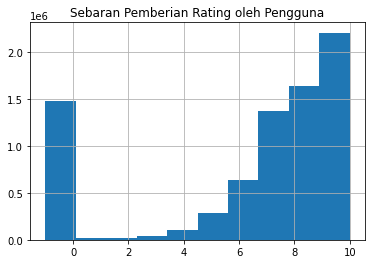

In [ ]:
#sebaran pemberian rating
rating.rating.hist()
plt.title("Sebaran Pemberian Rating oleh Pengguna")
plt.show()

Berdasarkan statistik deskriptif maupun histogram dapat dilihat bahwa rating yang bernilai -1 masih banyak muncul pada dataset rating. Selain itu, terdapat kecenderungan pengguna memberikan rating yang tinggi pada anime.

## Data Preparation

#### 1. Penyesuaian Tipe Data

Kita akan mengubah tipe data atribut anime_id dari yang semula bertipe integer menjadi objek karena anime_id merupakan data nominal dan untuk mengantisispasi terjadinya operasi perhitungan. 

In [ ]:
#mengubah tipe data anime_id 
anime['anime_id'] = anime['anime_id'].astype('object')
rating['anime_id'] = rating['anime_id'].astype('object')

In [ ]:
#info tipe data anime
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  object 
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 672.5+ KB


In [ ]:
#info tipe data rating
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   anime_id  object
 2   rating    int64 
dtypes: int64(2), object(1)
memory usage: 178.8+ MB


#### 2. Menghapus Baris dengan Missing Value dan Noise
Pada dataset anime kita akan menghapus baris dengan missing value pada atribut genre. Hal ini karena sistem rekomendasi yang akan dibangun (content based) memerlukan atribut genre yang memiliki value. Di sisi lain, pada dataset rating terdapat rating yang bernilai -1 sehingga berpotensi menjadi noise ketika digunakan untuk membuat sistem rekomendasi berbasis collaborative filtering. 

In [ ]:
#menghapus baris dengan genre yang bernilai Nan 
anime_clean = anime.dropna(axis=0, subset=['genre'])

#cek apakah masih terdapat missing value pada atribut genre
anime_clean.isnull().sum()

anime_id      0
name          0
genre         0
type         22
episodes      0
rating      215
members       0
dtype: int64

In [ ]:
#cek jumlah data
print(anime.shape)
print(anime_clean.shape)

(12294, 7)
(12232, 7)


In [ ]:
#menghapus baris dengan rating yang bernilai -1
rating_clean = rating[rating['rating'] != -1]

#cek apakah masih terdapat nilai -1 pada atribut rating
rating_clean.rating.describe()

count    6.337241e+06
mean     7.808497e+00
std      1.572496e+00
min      1.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

In [ ]:
#cek jumlah data
print(rating.shape)
print(rating_clean.shape)

(7813737, 3)
(6337241, 3)


#### 3. Perbaikan Penulisan Jenis Genre

Diketahui masih terdapat jenis genre yang terdiri dari 2 kata atau lebih, misalnya slice of life. Spasi pada kategori tersebut harus kita ganti dengan tanda garis bawah ( _ ) supaya pada saat menggunakan TfidfVectorizer kata-katanya tidak terpisah menjadi slice, of, dan life. 

In [ ]:
genre_transform = {"Slice of Life":"Slice_of_Life",
                   "Super Power":"Super_Power",
                   "Martial Arts":"Martial_Arts",
                   "Shounen Ai":"Shounen_Ai",
                   "Shoujo Ai":"Shoujo_Ai",
                   "Sci-Fi":"Sci_Fi"}

#fungsi untuk mengubah format penamaan genre
def transform(list_genre):
    new_list = []
    for g in list_genre:
        if g not in genre_transform.keys(): #jika nama genre sudah tepat, masukkan ke dalam list baru
            new_list.append(g)
        else:
            correct_genre = g.replace(g, genre_transform[g]) #jika belum, ganti berdasarkan data dari dict
            new_list.append(correct_genre)
    return new_list

In [ ]:
#check fungsi apakah sudah berhasil atau belum
list_g = ["Slice of Life", "Shoujo Ai"]
transform(list_g)

['Slice_of_Life', 'Shoujo_Ai']

In [ ]:
#masukan masing-masing genre dalam satu baris pada atribut genre ke dalam list
anime_clean['genre_list'] = anime_clean['genre'].apply(lambda x: [i.strip() for i in x.split(",")])

#ubah nama yang kurang cocok sesuai format, aplikasikan fungsi transform
anime_clean['genre_list'] = anime_clean['genre_list'].apply(lambda x: transform(x))

#buat kolom baru bernama genre_clean untuk pembuatan matriks TfidfVectorizer
anime_clean['genre_clean'] = anime_clean['genre_list'].apply(lambda x:" ".join(x))

#cek hasil
anime_clean.head()

,anime_id,name,genre,type,episodes,rating,members,genre_list,genre_clean
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[Drama, Romance, School, Supernatural]",Drama Romance School Supernatural
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",Action Adventure Drama Fantasy Magic Military ...
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ...",Action Comedy Historical Parody Samurai Sci_Fi...
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"[Sci_Fi, Thriller]",Sci_Fi Thriller
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ...",Action Comedy Historical Parody Samurai Sci_Fi...


#### 4. Pemilihan Atribut
Untuk membangun sistem rekomendasi berbasis genre, atribut yang akan digunakan yakni anime_id, name, dan genre. Di sisi lain, untuk membangun sistem rekomendasi dengan metode collaborative filtering, atribut yang digunakan yakni user_id, anime_id, dan rating ditambah nama anime dan genre pada dataset anime. Oleh karena itu dilakukan penggabungan data rating dengan anime menggunakan inner join karena tidak semua anime diberikan rating oleh pengguna.

In [ ]:
#data yang digunakan untuk membangun genre based recommendation system
genre_based = anime_clean[['anime_id','name','genre_clean', 'genre_list']]
genre_based.head()

,anime_id,name,genre_clean,genre_list
0,32281,Kimi no Na wa.,Drama Romance School Supernatural,"[Drama, Romance, School, Supernatural]"
1,5114,Fullmetal Alchemist: Brotherhood,Action Adventure Drama Fantasy Magic Military ...,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,28977,Gintama°,Action Comedy Historical Parody Samurai Sci_Fi...,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,9253,Steins;Gate,Sci_Fi Thriller,"[Sci_Fi, Thriller]"
4,9969,Gintama&#039;,Action Comedy Historical Parody Samurai Sci_Fi...,"[Action, Comedy, Historical, Parody, Samurai, ..."


In [ ]:
#data yang digunakan untuk membangun collaborative filtering recommendation system
col_fil = rating_clean.merge(genre_based,'inner')
col_fil.head()

,user_id,anime_id,rating,name,genre_clean,genre_list
0,1,8074,10,Highschool of the Dead,Action Ecchi Horror Supernatural,"[Action, Ecchi, Horror, Supernatural]"
1,3,8074,6,Highschool of the Dead,Action Ecchi Horror Supernatural,"[Action, Ecchi, Horror, Supernatural]"
2,5,8074,2,Highschool of the Dead,Action Ecchi Horror Supernatural,"[Action, Ecchi, Horror, Supernatural]"
3,12,8074,6,Highschool of the Dead,Action Ecchi Horror Supernatural,"[Action, Ecchi, Horror, Supernatural]"
4,14,8074,6,Highschool of the Dead,Action Ecchi Horror Supernatural,"[Action, Ecchi, Horror, Supernatural]"


#### 5. Melakukan Encoding Atribut "user_id" dan "anime_id" (Collaborative Filtering)

Model collaborative filtering yang akan dibangun memanfaatkan model deep learning sehingga perlu dilakukan pemrosesan awal pada data seperti encoding atribut yang bersangkutan. Pada tahap ini dilakukan proses encoding atribut "user_id" dan "anime_id" ke dalam bilangan integer. Setelah itu, kedua atribut dipetakan ke dalam dataframe yang berkaitan yakni "col_fil". Terakhir adalah memastikan bahwa atribut rating memiliki tipe data float. Berhubung atribut ini masih berupa integer, maka dilakukan perubahan tipe data menjadi float.

In [ ]:
# mengubah user_id menjadi list tanpa nilai yang sama
user_ids = col_fil['user_id'].sort_values().unique().tolist()
     
# melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
     
# melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [ ]:
# mengubah anime_id menjadi list tanpa nilai yang sama
anime_ids = col_fil['anime_id'].unique().tolist()
     
# melakukan proses encoding anime_id
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
     
# melakukan proses encoding angka ke anime_id
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

In [ ]:
# mapping user_id ke dataframe user 
col_fil['user'] = col_fil['user_id'].map(user_to_user_encoded)
     
# mapping place_id ke dataframe anime
col_fil['anime'] = col_fil['anime_id'].map(anime_to_anime_encoded)

In [ ]:
# mendapatkan jumlah user 
num_users = len(user_to_user_encoded)
print(f"Jumlah user: {num_users}")
     
# mendapatkan jumlah anime
num_anime = len(anime_to_anime_encoded)
print(f"Jumlah anime: {num_anime}")
     
# mengubah tipe data rating menjadi float
col_fil['rating'] = col_fil['rating'].values.astype(np.float32)
     
# nilai minimum rating
min_rating = min(col_fil['rating'])
print(f"Minimum rating: {min_rating}")
     
# nilai maksimal rating
max_rating = max(col_fil['rating'])
print(f"Maksimum rating: {max_rating}")

Jumlah user: 69600
Jumlah anime: 9894
Minimum rating: 1.0
Maksimum rating: 10.0


In [ ]:
col_fil.head()

,user_id,anime_id,rating,name,genre_clean,genre_list,user,anime
0,1,8074,10.0,Highschool of the Dead,Action Ecchi Horror Supernatural,"[Action, Ecchi, Horror, Supernatural]",0,0
1,3,8074,6.0,Highschool of the Dead,Action Ecchi Horror Supernatural,"[Action, Ecchi, Horror, Supernatural]",2,0
2,5,8074,2.0,Highschool of the Dead,Action Ecchi Horror Supernatural,"[Action, Ecchi, Horror, Supernatural]",3,0
3,12,8074,6.0,Highschool of the Dead,Action Ecchi Horror Supernatural,"[Action, Ecchi, Horror, Supernatural]",9,0
4,14,8074,6.0,Highschool of the Dead,Action Ecchi Horror Supernatural,"[Action, Ecchi, Horror, Supernatural]",10,0


#### 6. Membagi Dataset Menjadi Train dan Validation (Collaborative Filtering)
Setelah melakukan encoding, selanjutnya melakukan pembagian dataset dengan persentase 80% untuk pelatihan dan 20% untuk validasi. Supaya pembagian data terdistribusi secara random maka dilakukan pengacakan terlebih dahulu pada dataset rating. Variabel independent (x) yang akan digunakan yakni atribut user dan anime sedangkan variabel dependennya (y) adalah rating yang telah dinormalisasi supaya memudahkan dalam proses pemodelan. Metode normalisasi yang digunakan yakni min max scaler.

<img src="https://www.oreilly.com/library/view/regression-analysis-with/9781788627306/assets/ffb3ac78-fd6f-4340-aa92-cde8ae0322d6.png" width=300>

In [ ]:
#variabel independen
x = col_fil[['user', 'anime']].values
 
# pemilihan rating sebagai var dependen dengan normalisasi min max 
y = col_fil['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# membagi data menjadi 80% data train dan 20% data validasi
train_idx = int(0.8 * col_fil.shape[0])
x_train, x_val, y_train, y_val = (x[:train_idx], x[train_idx:], y[:train_idx], y[train_idx:])

## Modeling and Result

### 1. Content Based Filtering

Content based filtering merupakan sistem rekomendasi personalized yang merekomendasikan item yang mirip dengan item yang disukai pengguna di masa lampau. Algoritma ini bekerja dengan memberikan saran berdasarkan kemiripan item yang direkomendasikan dengan item yang disukai dari data objek seperti genre anime, penulis, sutradara, artis dan lain-lain. Berikut merupakan ilustrasi sistem rekomendasi yang akan dibuat berdasarkan kemiripan genre.

<img src="https://user-images.githubusercontent.com/61647791/164959912-a113ff8b-4961-4c55-a377-3aa1ec196f40.png" width=500>

Menurut Lops dkk. (2010) sistem rekomendasi berbasis konten memiliki keunggulan serta kekurangan sebagai berikut:

**Keunggulan:**
- **User independence**: Sistem rekomendasi tidak bergantung pada user lainnya. Sistem membangun profil dengan cara mengeksploitasi penilaian pengguna aktif.
- **Transparency**: Cara kerja sistem rekomendasi dijelaskan dengan rinci dalam memunculkan item yang relevan berdasarkan fitur konten.
- **New Item:** Mampu merekomendasikan item yang belum pernah dinilai oleh pengguna.

**Kekurangan:**
- **Limited Content Analysis:** Memiliki keterbatasan dalam jumlah maupun jenis fitur yang terkait, begitupula dengan item-item yang disarankan.  
- **Over-Specialization:** Sistem tidak memiliki metode yang melekat untuk menemukan sesuatu yang tidak terduga. Sistem akan menunjukkan item yang nilainya tinggi, kemudian dicocokkan dengan profil pengguna, sehingga akan selalu menemukan item serupa seperti yang sudah direkomendasikan sebelumnya.
- **New User:** Sistem tidak dapat memberikan rekomendasi yang handal pada pengguna baru, dikarenakan membutuhkan penelusuran terkait preferensi pengguna.


Untuk membangun sistem rekomendasi berbasis konten, khususnya genre hal pertama yang harus dilakukan adalah membuat matriks korelasi anime dengan genre berukuran (mxn) di mana m menunjukkan nama anime, sedangkan n menunjukkan genre. Untuk membuat matriks tersebut kita akan menggunakan TfidfVectorizer dari library scikit-learn. Berikut merupakan tahapan coding pembuatan matriks korelasi anime dengan genre.

In [ ]:
#membuat matriks

tf_ = TfidfVectorizer()
tf_.fit(genre_based['genre_clean'])

#cek jenis-jenis genre anime
#tf_.get_feature_names()

TfidfVectorizer()

In [ ]:
# Melakukan fit kemudian transformasi ke dalam bentuk matrix
tfidf_matrix = tf_.fit_transform(genre_based['genre_clean']) 
    
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(12232, 43)

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29404249, 0.31699975, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.26080455, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan genre anime
# Baris diisi dengan nama anime
# Ukuran matrix sangat besar sehingga kita ambil 10 jenis genre dengan 10 nama anime untuk melihat gambaran

pd.DataFrame(
             tfidf_matrix.todense(), 
             columns=tf_.get_feature_names(),
             index= genre_based.name
             ).sample(10, axis=1).sample(10, axis=0)

,magic,military,parody,yaoi,historical,psychological,police,shoujo_ai,mecha,horror
name,,,,,,,,,,
Corpse Party: Missing Footage,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.805922
Michi (Music),0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Nekomonogatari: Kuro,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Ghibli ga Ippai Special Short Short,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Kero Kero Keroppi no Sanjuushi,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Isshuukan Friends.: Tomodachi to no Omoide,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
91 Days Recap,0.0,0.0,0.0,0.0,0.706223,0.0,0.0,0.0,0.0,0.000000
Fuku-chan,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Ikkyuu-san: Haru Da! Yancha Hime,0.0,0.0,0.0,0.0,0.717375,0.0,0.0,0.0,0.0,0.000000


Dari pembuatan matriks korelasi anime dengan genre diperoleh matriks berukuran 12232x43. Pada tahap selanjutnya, dibuatlah matriks kesamaan antar anime berukuran (mxm). Semakin mirip anime satu dengan lainnya maka skor kesamaan akan mendekati satu, begitupun sebalinkya. Untuk menghitung nilai kesamaan antar anime digunakanlah cosine similarity. Cosine similarity akan menghitung sudut cosinus antara dua vektor. Semakin kecil sudut cosinus-nya maka semakin besar cosine similarity. Metrik ini seringkali digunakan mengukur kesamaan antar teks atau kata sehingga cocok digunakan dalam kasus ini. Berikut merupakan ilustrasi dari cosine similarity.    
<img src="https://www.researchgate.net/publication/320914786/figure/fig2/AS:558221849841664@1510101868614/The-difference-between-Euclidean-distance-and-cosine-similarity.png" width=400>
<br>
<img src="https://i0.wp.com/clay-atlas.com/wp-content/uploads/2020/03/cosine-similarity-2.png?fit=800%2C208&ssl=1" width=400>


In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.14755006, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14755006, 1.        , 0.18836473, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.18836473, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama anime
cosine_sim_df = pd.DataFrame(cosine_sim, index=genre_based['name'], columns=genre_based['name'])
print('Shape:', cosine_sim_df.shape)
     
# Melihat similarity matrix pada 10 judul anime saja
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (12232, 12232)


name,G-9,Berserk: Ougon Jidai-hen II - Doldrey Kouryaku,Ayatsuri Ningyou,Techno Police 21C,Bakujuu Gasshin Ziguru Hazeru,Hitoribotchi,Ninja Senshi Tobikage,Marude Dameo,Muramasa,The Olympic Adventures of Fuwa
name,,,,,,,,,,
Yuuto-kun ga Iku Movie,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Qin Shiming Yue Zhi: Zhu Zi Bai Jia,0.376043,0.170446,0.0,0.117396,0.196926,0.000000,0.000000,0.000000,0.562693,0.000000
Twilight Q,0.000000,0.000000,0.0,0.149968,0.000000,0.000000,0.145250,0.241111,0.000000,0.000000
Fate/kaleid liner Prisma☆Illya 2wei!,0.478061,0.216688,0.0,0.149245,0.250351,0.000000,0.000000,0.153809,0.000000,0.352803
Natural,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Taiyou no Kiba Dagram,0.000000,0.329320,0.0,0.375300,0.391546,0.374482,0.520403,0.488581,0.000000,0.000000
7-kakan.,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chain Chronicle: Haecceitas no Hikari Part 3,0.406366,0.282527,0.0,0.126862,0.212806,0.000000,0.321738,0.297022,0.000000,0.000000
TOTO Green Challenge,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Untuk mendapatkan top N rekomendasi berdasarkan genre, dibuatlah suatu fungsi dengan parameter nama anime, dataframe kesamaan berukuran nxn, kolom yang ditampilkan serta jumlah rekomendasi yang diinginkan. Kita akan menggunakan fungsi tersebut untuk memunculkan top 5 rekomendasi yang memiliki kemiripan dengan anime Fullmetal Alchemist. 

In [ ]:
#mendapatkan rekomendasi
def anime_recommendations(anime, k, similarity_df=cosine_sim_df, items=genre_based[['name', 'genre_list']]):
    
    """
    Rekomendasi Anime berdasarkan genre
     
    Parameter:
    ---
    anime : string (str)
            Nama anime
    similarity_data : tipe data pd.DataFrame (object)
                      Dataframe kesamaan berukuran nxn dengan anime sebagai indeks dan kolom
    items : tipe data object
            kolom yang ditampilkan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Jumlah rekomendasi yang diberikan
    ---
    """
    
    # Mengambil index data dengan nilai cosine similartity terbesar menggunakan argpartition sebanyak k
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_df.loc[:,anime].to_numpy().argpartition(range(-1, -k, -1))
        
    # Mengambil nama anime dengan similarity terbesar dari index yang ada
    closest = similarity_df.columns[index[-1:-(k+2):-1]]
        
    # Drop nama anime agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(anime, errors='ignore')
    
     
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
#Top 5 Recommendation
anime_recommendations("Fullmetal Alchemist", 5)

,name,genre_list
0,Fullmetal Alchemist: The Sacred Star of Milos,"[Action, Adventure, Comedy, Drama, Fantasy, Ma..."
1,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,Fullmetal Alchemist: Brotherhood Specials,"[Adventure, Drama, Fantasy, Magic, Military, S..."
3,Fullmetal Alchemist: Reflections,"[Adventure, Comedy, Drama, Fantasy, Military, ..."
4,Fairy Tail x Rave,"[Action, Adventure, Comedy, Fantasy, Magic, Sh..."


### 2. Collaborative Filtering

Kita akan membuat sistem rekomendasi collaborative filtering yang memanfaatkan penerapan deep learning. Sistem rekomendasi ini akan memanfaatkan data rating yang telah diberikan pengguna pada suatu anime kemudian melakukan prediksi anime yang disukai dan belum pernah dilihat. Hal ini bisa menjadi kekurangan apabila data rating anime yang diberikan user tidak tersedia. Kita akan menggunakan library keras dan tensorflow kemudian membuat kelas serta fungsi untuk membangun sistem rekomendasi berbasis deep learning. 

Pada proses pelatihan, model akan menghitung skor kecocokan antara pengguna dengan anime dengan rentang 0 sampai 1. Tahap pertama yakni melakukan proses embedding pada data user dan anime. Setelah itu, dilakukan operasi dot product antara embedding user dengan anime kemudian ditambahkan bias untuk setiap user dan anime. Fungsi aktivasi sigmoid digunakan untuk menghitung skor kecocokan berdasarkan hasil perhitungan tersebut.

In [ ]:
class AnimeRecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_anime, embedding_size, **kwargs):
        super(AnimeRecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_anime = num_anime
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
        self.anime_embedding = layers.Embedding( # layer embeddings anime
            num_anime,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        
    # Insialisasi fungsi
    def call(self, inputs):
        self.anime_bias = layers.Embedding(num_anime, 1) # layer embedding anime bias
     
        user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
        user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
        anime_vector = self.anime_embedding(inputs[:, 1]) # memanggil layer embedding 3
        anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4
     
        dot_user_anime = tf.tensordot(user_vector, anime_vector, 2) 
     
        x = dot_user_anime + user_bias + anime_bias
        
        return tf.nn.sigmoid(x) # fungsi aktivasi sigmoid

In [ ]:
model = AnimeRecommenderNet(num_users, num_anime, 50) # inisialisasi model
     
# model compile
model.compile(
                loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-6),
                metrics=[tf.keras.metrics.RootMeanSquaredError()]
             )

In [ ]:
# melakukan training     
history = model.fit( x = x_train,
                     y = y_train,
                     batch_size = 4000, #jumlah data sangat banyak sehingga 
                     epochs = 15,       #batch size diperbesar
                     validation_data = (x_val, y_val)
                   )

Epoch 1/15
1268/1268 [==============================] - 117s 92ms/step - loss: 0.6938 - root_mean_squared_error: 0.3197 - val_loss: 0.6933 - val_root_mean_squared_error: 0.2714
Epoch 2/15
1268/1268 [==============================] - 115s 91ms/step - loss: 0.6909 - root_mean_squared_error: 0.3174 - val_loss: 0.6928 - val_root_mean_squared_error: 0.2709
Epoch 3/15
1268/1268 [==============================] - 118s 93ms/step - loss: 0.6880 - root_mean_squared_error: 0.3152 - val_loss: 0.6928 - val_root_mean_squared_error: 0.2709
Epoch 4/15
1268/1268 [==============================] - 116s 92ms/step - loss: 0.6851 - root_mean_squared_error: 0.3128 - val_loss: 0.6926 - val_root_mean_squared_error: 0.2707
Epoch 5/15
1268/1268 [==============================] - 116s 92ms/step - loss: 0.6820 - root_mean_squared_error: 0.3104 - val_loss: 0.6925 - val_root_mean_squared_error: 0.2707
Epoch 6/15
1268/1268 [==============================] - 119s 94ms/step - loss: 0.6789 - root_mean_squared_error: 0.

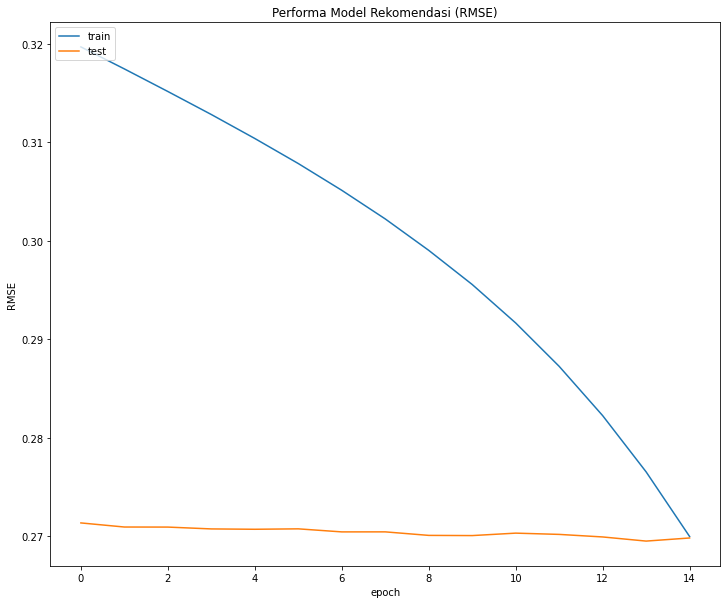

In [ ]:
#evaluasi model

plt.figure(figsize=(12,10))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Performa Model Rekomendasi (RMSE)')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Untuk menguji model rekomendasi ini, kita akan mengambil sampel user secara acak serta mendefinisikan variabel bernama **anime_not_watched** yang menunjukkan anime yang belum pernah ditonton oleh pengguna tersebut. Variabel **anime_not_watched** akan menjadi anime yang direkomendasikan.   

In [ ]:
# mengambil sample user
user_id = col_fil.user_id.sample(1).iloc[0]
anime_watched_by_user = col_fil[col_fil.user_id == user_id]
     
# menggunakan operator bitwise untuk mengambil anime yang belum pernah ditonton pengguna 
anime_not_watched = col_fil[~col_fil['user_id'].isin(anime_watched_by_user.anime_id.values)]['anime_id'] 
anime_not_watched = list(set(anime_not_watched).intersection(set(anime_to_anime_encoded.keys())))
     
anime_not_watched = [[anime_to_anime_encoded.get(x)] for x in anime_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(([[user_encoder]] * len(anime_not_watched), anime_not_watched))

In [ ]:
ratings = model.predict(user_anime_array).flatten()
     
top_ratings_idx = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [anime_encoded_to_anime.get(anime_not_watched[x][0]) for x in top_ratings_idx]
     
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print("\n")
print('Anime with high ratings from user')
print('----' * 8)
     
top_anime_user = (anime_watched_by_user.sort_values(by = 'rating',ascending=False).head(5).anime_id.values)
     
anime_df_rows = col_fil[col_fil['anime_id'].isin(top_anime_user)]
anime_dict = {name:genre for name in anime_df_rows["name"].values for genre in anime_df_rows["genre_clean"].values}

for key, val in anime_dict.items():
    print(key, ':', val)

print('----' * 8)
print('Top 10 anime recommendation')
print('----' * 8)
     
recommended_anime = col_fil[col_fil['anime_id'].isin(recommended_anime_ids)]
recommended_dict = {name:genre for name in recommended_anime["name"].values for genre in recommended_anime["genre_clean"].values}
for key, val in recommended_dict.items():
    print(key, ':', val)

Showing recommendations for users: 17025


Anime with high ratings from user
--------------------------------
Angel Beats! : Comedy Drama Romance School Sports
Bakuman. 2nd Season : Comedy Drama Romance School Sports
Hunter x Hunter (2011) : Comedy Drama Romance School Sports
Bakuman. 3rd Season : Comedy Drama Romance School Sports
Cross Game : Comedy Drama Romance School Sports
--------------------------------
Top 10 anime recommendation
--------------------------------
Afro Samurai : Drama Kids
Kaze Tachinu : Drama Kids
Angel Blade : Drama Kids
Soul Eater: Late Night Show : Drama Kids
Tetsujin 28-gou (2004) : Drama Kids
Bishoujo Mobage: Mobami-chan : Drama Kids
Dark Blue : Drama Kids
Jetter Mars : Drama Kids
Pinky Monkey x FaFa Collaboration Animation: At Afternoon of Sunny Day : Drama Kids
Hibike! Wadaiko : Drama Kids


## Evaluasi

#### 1. Content Based Filtering

Untuk mengukur performa model rekomendasi berbasi konten, digunakanlah metrik berupa presisi yang dihitung dengan cara membagi jumlah prediksi yang tepat terhadap seluruh seluruh prediksi yang salah maupun tepat. Berikut merupakan rumus dan ilustrasi dari metrik presisi, khususnya dalam kasus ini.

<img src="https://user-images.githubusercontent.com/61647791/165103309-26b85e6c-3fce-4851-9442-75d92c565d60.png" width=500>


Dikarenakan terdapat lebih dari satu genre dalam satu anime, skor dihitung berdasarkan rata-rata presisi kecocokan masing-masing genre dalam anime yang telah ditonton terhadap masing-masing genre pada anime yang direkomendasikan.

<img src="https://user-images.githubusercontent.com/61647791/165105550-a7e97667-4ea2-4ac0-83ee-bb87901c6099.png" width=500>

Berikut merupakan skor presisi sistem rekomendasi berbasis konten, dalam hal ini menggunakan anime Fullmetal Alchemist.

<img src="https://user-images.githubusercontent.com/61647791/165108457-99488a1d-6a1d-4d29-a71b-2bfd81e36ab3.png" >

#### 2. Collaborative Filtering

Performa model rekomendasi collaborative filtering yang menggunakan deep learning diukur menggunakan metrik root mean square error (RMSE) terhadap nilai aktual dan prediksi. Berikut merupakan formula RMSE yang digunakan:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200622171741/RMSE1.jpg" >

Dengan memplotkan skor RMSE pada saat pelatihan dan validasi di setiap epoch, diperoleh grafik performa model rekomendasi collaborative filtering berbasis deep learning seperti di bawah ini.

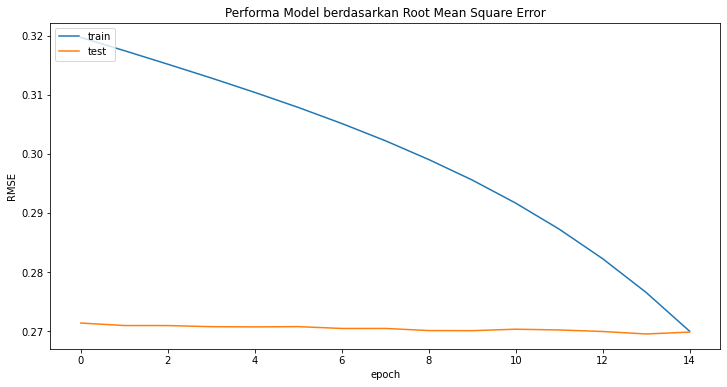

In [ ]:
#evaluasi model

plt.figure(figsize=(12,6))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Performa Model berdasarkan Root Mean Square Error')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

RMSE yang diperoleh pada saat pelatihan maupun validasi di epoch terakhir berturut-turut sebesar 0.2700 dan _0.2698. Eror ini tergolong rendah sehingga model dikatakan layak.

## Daftar Pustaka

**Paper:**

Lops, P., de Gemmis, M. and Semeraro, G. (2010), "Content-based Recommender Systems: State of the Art and Trends", Recommender Systems Handbook, pp. 73-105.

**Website:**

Gulati, V. (2022), "Top 10 Countries where Anime is Most Popular and Why!", Epic Dope, available at: https://www.epicdope.com/top-10-countries-where-anime-is-most-popular-and-why/ (accessed 21 April 2022).

https://www.dicoding.com